<a href="https://colab.research.google.com/github/armandossrecife/teste/blob/main/testes_tcc_gustavo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importa Dados

In [168]:
!rm -rf *.xlsx
!rm -rf *.xlsx.1

In [169]:
!wget https://github.com/armandossrecife/teste/raw/main/clonagem_sincrona.xlsx

--2024-01-09 13:51:06--  https://github.com/armandossrecife/teste/raw/main/clonagem_sincrona.xlsx
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/armandossrecife/teste/main/clonagem_sincrona.xlsx [following]
--2024-01-09 13:51:06--  https://raw.githubusercontent.com/armandossrecife/teste/main/clonagem_sincrona.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10682 (10K) [application/octet-stream]
Saving to: ‘clonagem_sincrona.xlsx’

clonagem_sincrona.x 100%[===================>]  10.43K  --.-KB/s    in 0s      

2024-01-09 13:51:06 (83.1 MB/s) - ‘clonagem_sincrona.xlsx’ saved [10682/10682]



In [170]:
!wget https://github.com/armandossrecife/teste/raw/main/clonagem_assincrona.xlsx

--2024-01-09 13:51:10--  https://github.com/armandossrecife/teste/raw/main/clonagem_assincrona.xlsx
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/armandossrecife/teste/main/clonagem_assincrona.xlsx [following]
--2024-01-09 13:51:10--  https://raw.githubusercontent.com/armandossrecife/teste/main/clonagem_assincrona.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10726 (10K) [application/octet-stream]
Saving to: ‘clonagem_assincrona.xlsx’

clonagem_assincrona 100%[===================>]  10.47K  --.-KB/s    in 0s      

2024-01-09 13:51:11 (22.9 MB/s) - ‘clonagem_assincrona.xlsx’ saved [1072

In [171]:
!wget https://github.com/armandossrecife/teste/raw/main/repositorios_clonados.xlsx

--2024-01-09 13:51:13--  https://github.com/armandossrecife/teste/raw/main/repositorios_clonados.xlsx
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/armandossrecife/teste/main/repositorios_clonados.xlsx [following]
--2024-01-09 13:51:13--  https://raw.githubusercontent.com/armandossrecife/teste/main/repositorios_clonados.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6295 (6.1K) [application/octet-stream]
Saving to: ‘repositorios_clonados.xlsx’

repositorios_clonad 100%[===================>]   6.15K  --.-KB/s    in 0s      

2024-01-09 13:51:13 (67.8 MB/s) - ‘repositorios_clonados.xlsx’ s

# Funções de apoio

In [193]:
import matplotlib.pyplot as plt

def convert_to_time_delta(df, coluna):
  segundos = coluna + '_s'
  df[segundos] = df[coluna].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)
  return df

def calcula_media_colunas(df, lista_colunas):
  soma = 0
  for i, item in enumerate(lista_colunas):
    soma = soma + df[lista_colunas[i]]
  #soma_colunas = df[lista_colunas[0]] + df[lista_colunas[1]] + df[lista_colunas[2]] + df[lista_colunas[3]] + df[lista_colunas[4]]
  soma_colunas = soma
  df['media_s'] = soma_colunas/5
  return df

def atualiza_df(df):
  df = calcula_media_colunas(df, ['teste1_s', 'teste2_s', 'teste3_s', 'teste4_s', 'teste5_s'])
  df = df[['Repositorio', 'teste1_s',	'teste2_s',	'teste3_s',	'teste4_s',	'teste5_s',	'media_s']]
  return df

def cria_box_plot(df, lista_colunas, titulo, x_label):
  df[lista_colunas].boxplot()
  plt.title(titulo)
  plt.xlabel(x_label)
  plt.ylabel("Tempo de Clonagem (s)")
  plt.show()

def two_boxplots(df1, df2):
  # Create the plot
  plt.figure(figsize=(8, 6))
  df1.boxplot(positions=[1])  # Position 1 for first boxplot
  df2.boxplot(positions=[2], color='red')  # Position 2 for second boxplot, red color
  plt.xlabel("Grupos")
  plt.ylabel("Tempo (s)")
  plt.title("Compara tempos individuais de clonagem")
  plt.xticks([1, 2], ["Clonagem Síncrona", "Clonagem Assíncrona"])
  plt.grid(True)
  plt.show()

# Cria os dataframes

In [173]:
import pandas as pd

In [174]:
df_clonagem_sincrona = pd.read_excel('clonagem_sincrona.xlsx')
df_clonagem_assincrona = pd.read_excel('clonagem_assincrona.xlsx')
df_repositorios = pd.read_excel('repositorios_clonados.xlsx')

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


## Testes da Clonagem Síncrona

In [175]:
df_clonagem_sincrona

,Repositorio,Teste 1,Teste 2,Teste 3,Teste 4,Teste 5,Media
0,https://github.com/apache/accumulo,00:00:18,00:00:12,00:00:17,00:00:15,00:00:15,00:00:15.400000
1,https://github.com/apache/calcite,00:00:19,00:00:21,00:00:16,00:00:15,00:00:12,00:00:16.600000
2,https://github.com/apache/chukwa,00:00:06,00:00:07,00:00:08,00:00:05,00:00:05,00:00:06.200000
3,https://github.com/apache/cassandra,00:00:38,00:00:47,00:00:40,00:00:45,00:01:39,00:00:53.800000
4,https://github.com/apache/jackrabbit,00:00:11,00:00:13,00:00:09,00:00:14,00:00:12,00:00:11.800000
5,https://github.com/FasterXML/jackson,00:00:06,00:00:03,00:00:05,00:00:07,00:00:04,00:00:05
6,https://github.com/apache/jspwiki,00:00:16,00:00:16,00:00:12,00:00:12,00:00:20,00:00:15.200000
7,https://github.com/square/retrofit,00:00:02,00:00:02,00:00:02,00:00:03,00:00:03,00:00:02.400000
8,https://github.com/apache/struts,00:00:12,00:00:18,00:00:18,00:00:16,00:00:12,00:00:15.200000
9,https://github.com/apache/jena,00:00:55,00:01:03,00:00:58,00:00:48,00:00:45,00:00:53.800000


## Testes da Clonagem Assíncrona

In [177]:
df_clonagem_assincrona

,Unnamed: 0,Teste 1,Teste 2,Teste 3,Teste 4,Teste 5,Medias
0,https://github.com/apache/accumulo,00:00:41,00:00:42,00:00:37,00:00:30,00:00:30,00:00:36
1,https://github.com/apache/calcite,00:00:33,00:00:41,00:00:37,00:00:42,00:00:35,00:00:37.600000
2,https://github.com/apache/chukwa,00:00:21,00:00:20,00:00:15,00:00:25,00:00:24,00:00:21
3,https://github.com/apache/cassandra,00:01:51,00:01:58,00:01:48,00:01:37,00:01:39,00:01:46.600000
4,https://github.com/apache/jackrabbit,00:00:30,00:00:29,00:00:36,00:00:32,00:00:28,00:00:31
5,https://github.com/FasterXML/jackson,00:00:16,00:00:11,00:00:15,00:00:12,00:00:11,00:00:13
6,https://github.com/apache/jspwiki,00:00:31,00:00:39,00:00:34,00:00:42,00:00:33,00:00:35.800000
7,https://github.com/square/retrofit,00:00:06,00:00:03,00:00:04,00:00:05,00:00:06,00:00:04.800000
8,https://github.com/apache/struts,00:00:33,00:00:38,00:00:34,00:00:32,00:00:40,00:00:35.400000
9,https://github.com/apache/jena,00:01:44,00:02:13,00:01:53,00:01:55,00:02:04,00:01:57.800000


# Atualiza os dataframes

In [178]:
# Rename multiple columns:
novas_colunas1 = {'Teste 1': 'teste1', 'Teste 2': 'teste2', 'Teste 3': 'teste3', 'Teste 4': 'teste4', 'Teste 5': 'teste5'}
novas_colunas2 = {'Unnamed: 0': 'Repositorio', 'Teste 1': 'teste1', 'Teste 2': 'teste2', 'Teste 3': 'teste3', 'Teste 4': 'teste4', 'Teste 5': 'teste5'}

df_clonagem_sincrona.rename(columns=novas_colunas1, inplace=True)
df_clonagem_assincrona.rename(columns=novas_colunas2, inplace=True)

In [179]:
df_clonagem_sincrona = convert_to_time_delta(df_clonagem_sincrona, 'teste1')
df_clonagem_sincrona = convert_to_time_delta(df_clonagem_sincrona, 'teste2')
df_clonagem_sincrona = convert_to_time_delta(df_clonagem_sincrona, 'teste3')
df_clonagem_sincrona = convert_to_time_delta(df_clonagem_sincrona, 'teste4')
df_clonagem_sincrona = convert_to_time_delta(df_clonagem_sincrona, 'teste5')

df_clonagem_assincrona = convert_to_time_delta(df_clonagem_assincrona, 'teste1')
df_clonagem_assincrona = convert_to_time_delta(df_clonagem_assincrona, 'teste2')
df_clonagem_assincrona = convert_to_time_delta(df_clonagem_assincrona, 'teste3')
df_clonagem_assincrona = convert_to_time_delta(df_clonagem_assincrona, 'teste4')
df_clonagem_assincrona = convert_to_time_delta(df_clonagem_assincrona, 'teste5')

In [180]:
df_clonagem_sincrona = atualiza_df(df_clonagem_sincrona)
df_clonagem_assincrona = atualiza_df(df_clonagem_assincrona)

## Dados da Clonagem Síncrona

In [181]:
df_clonagem_sincrona

,Repositorio,teste1_s,teste2_s,teste3_s,teste4_s,teste5_s,media_s
0,https://github.com/apache/accumulo,18,12,17,15,15,15.4
1,https://github.com/apache/calcite,19,21,16,15,12,16.6
2,https://github.com/apache/chukwa,6,7,8,5,5,6.2
3,https://github.com/apache/cassandra,38,47,40,45,99,53.8
4,https://github.com/apache/jackrabbit,11,13,9,14,12,11.8
5,https://github.com/FasterXML/jackson,6,3,5,7,4,5.0
6,https://github.com/apache/jspwiki,16,16,12,12,20,15.2
7,https://github.com/square/retrofit,2,2,2,3,3,2.4
8,https://github.com/apache/struts,12,18,18,16,12,15.2
9,https://github.com/apache/jena,55,63,58,48,45,53.8


In [192]:
df_clonagem_sincrona.to_excel('clonagem_sincrona.xlsx', index=False)

## Dados da clonagem assíncrona

In [183]:
df_clonagem_assincrona

,Repositorio,teste1_s,teste2_s,teste3_s,teste4_s,teste5_s,media_s
0,https://github.com/apache/accumulo,41,42,37,30,30,36.0
1,https://github.com/apache/calcite,33,41,37,42,35,37.6
2,https://github.com/apache/chukwa,21,20,15,25,24,21.0
3,https://github.com/apache/cassandra,111,118,108,97,99,106.6
4,https://github.com/apache/jackrabbit,30,29,36,32,28,31.0
5,https://github.com/FasterXML/jackson,16,11,15,12,11,13.0
6,https://github.com/apache/jspwiki,31,39,34,42,33,35.8
7,https://github.com/square/retrofit,6,3,4,5,6,4.8
8,https://github.com/apache/struts,33,38,34,32,40,35.4
9,https://github.com/apache/jena,104,133,113,115,124,117.8


# Gera os boxplots

In [184]:
df_cs = df_clonagem_sincrona[['Repositorio', 'media_s']]
df_cs['tipo_clonagem'] = 'clonagem_sincrona'
df_cs

<ipython-input-184-0864a2f56135>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cs['tipo_clonagem'] = 'clonagem_sincrona'


,Repositorio,media_s,tipo_clonagem
0,https://github.com/apache/accumulo,15.4,clonagem_sincrona
1,https://github.com/apache/calcite,16.6,clonagem_sincrona
2,https://github.com/apache/chukwa,6.2,clonagem_sincrona
3,https://github.com/apache/cassandra,53.8,clonagem_sincrona
4,https://github.com/apache/jackrabbit,11.8,clonagem_sincrona
5,https://github.com/FasterXML/jackson,5.0,clonagem_sincrona
6,https://github.com/apache/jspwiki,15.2,clonagem_sincrona
7,https://github.com/square/retrofit,2.4,clonagem_sincrona
8,https://github.com/apache/struts,15.2,clonagem_sincrona
9,https://github.com/apache/jena,53.8,clonagem_sincrona


In [185]:
df_acs = df_clonagem_assincrona[['Repositorio', 'media_s']]
df_acs['tipo_clonagem'] = 'clonagem_assincrona'
df_acs

<ipython-input-185-ec0a84251ba8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acs['tipo_clonagem'] = 'clonagem_assincrona'


,Repositorio,media_s,tipo_clonagem
0,https://github.com/apache/accumulo,36.0,clonagem_assincrona
1,https://github.com/apache/calcite,37.6,clonagem_assincrona
2,https://github.com/apache/chukwa,21.0,clonagem_assincrona
3,https://github.com/apache/cassandra,106.6,clonagem_assincrona
4,https://github.com/apache/jackrabbit,31.0,clonagem_assincrona
5,https://github.com/FasterXML/jackson,13.0,clonagem_assincrona
6,https://github.com/apache/jspwiki,35.8,clonagem_assincrona
7,https://github.com/square/retrofit,4.8,clonagem_assincrona
8,https://github.com/apache/struts,35.4,clonagem_assincrona
9,https://github.com/apache/jena,117.8,clonagem_assincrona


## Distribuição dos tempos da clonagem síncrona

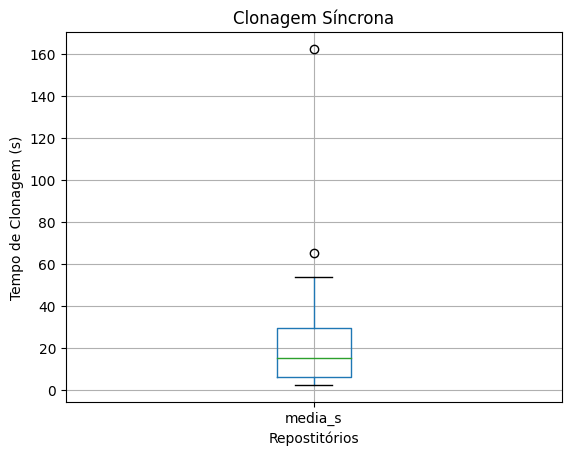

In [186]:
cria_box_plot(df_cs, ['tipo_clonagem', 'media_s'], 'Clonagem Síncrona', 'Repostitórios')

## Distribuição dos tempos da clonagem assíncrona

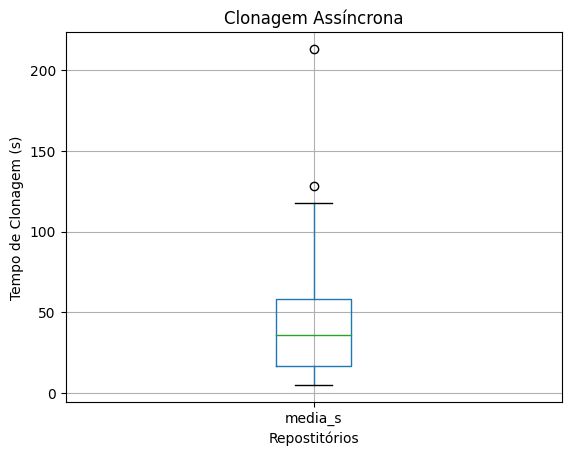

In [194]:
cria_box_plot(df_acs, ['tipo_clonagem', 'media_s'], 'Clonagem Assíncrona', 'Repostitórios')

## Compara os tempos de clonagem

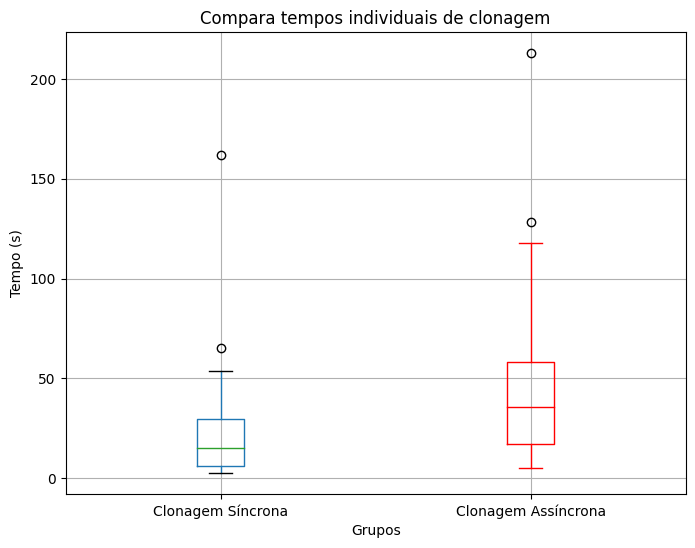

In [195]:
two_boxplots(df_cs, df_acs)

In [188]:
round(df_cs.describe(), 2)

,media_s
count,25.00
mean,25.75
std,33.90
min,2.40
25%,6.20
50%,15.20
75%,29.80
max,162.20


In [191]:
round(df_acs.describe(), 2)

,media_s
count,25.00
mean,50.66
std,50.76
min,4.80
25%,17.00
50%,35.80
75%,58.20
max,213.00
